## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
no_users  = df.user_id.nunique()
no_users 

290584

d. The proportion of users converted.

In [6]:
no_converted = df.query('converted == 1').user_id.nunique()

converted_rate = no_converted/no_users
print (converted_rate)

0.12104245244060237


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
Treatment_old= df.query('group == "treatment" & landing_page == "old_page"')
Treatment_old.shape[0]

1965

In [8]:
control_new= df.query('group == "control" & landing_page == "new_page"')
control_new.shape[0]

1928

In [9]:
print (" Number of new_page and treatment don't match = ", Treatment_old.shape[0]+control_new.shape[0])

 Number of new_page and treatment don't match =  3893


f. Do any of the rows have missing values?

In [10]:
df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
#drop records 
df.shape[0]

294478

In [13]:
treatment_new= df.query('group == "treatment" & landing_page == "new_page"')
treatment_new.shape[0] 


145311

In [14]:
control_old= df.query('group == "control" & landing_page == "old_page"')
control_old.shape[0] 

145274

In [15]:
df2 = treatment_new.append(control_old, ignore_index=True)
df2.shape

(290585, 5)

In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
#find the duplicate rows with same user ID
df2[df2.duplicated(['user_id'])]


,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [19]:
df2.iloc[1404]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 1404, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
#remove the specigied row
df2 = df2.drop(1404)
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
#percentage of converting 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# Create dataframe with all control records
control_df = df2.query('group == "control"')

# Compute conversion rate
control_conversion = control_df['converted'].mean()

# Display conversion rate
control_conversion

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
# Create dataframe with all reatment records
treatment_df = df2.query('group == "treatment"')

# Compute conversion rate
treatment_conversion = treatment_df['converted'].mean()

# Display conversion rate
treatment_conversion

0.11880806551510564

d. What is the probability that an individual received the new page?

In [24]:
df2.query('landing_page == "new_page"').user_id.count()/ df.user_id.count()

0.49344942576355449

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [25]:
# Compute observed difference in conversion rates
obs_diff = treatment_conversion - control_conversion
obs_diff

-0.0015782389853555567

**The observed difference above is showing a negative result (-0.0015) which means there is no sufficient evendence to conclude the the new version is better than the old one. **


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}:$** **$p_{new}$** - **$p_{old}$** <= 0




**$H_{1}:$** **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
df2['converted'].mean()

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
df2['converted'].mean()

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
treatment_df.user_id.nunique()


145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
control_df.user_id.count()

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
size = df2.shape[0]
new_page_converted = np.random.choice([0,1], size= size)
new_page_converted.mean()

0.50075021336343362

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0,1], size= size)
old_page_converted.mean()

0.49993461443162734

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() - old_page_converted.mean()

0.00081559893180627174

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
# Create sampling distribution for difference in conversion rates
# with boostrapping
p_diffs = []

for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    treatment_df = b_samp.query('group == "treatment"')
    control_conversion_rate = control_df['converted'].mean()
    treatment_conversion_rate = treatment_df['converted'].mean()
    p_diffs.append(treatment_conversion_rate -  control_conversion_rate)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [34]:
# convert to numpy array
p_diffs = np.array(p_diffs) 

In [35]:
# plot distribution
#plt.hist(p_diffs);

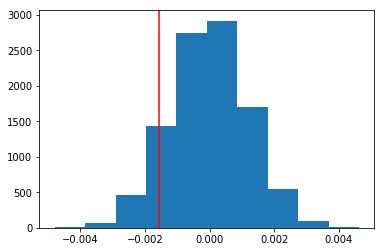

In [36]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# compute p value
(null_vals > obs_diff).mean()

0.90180000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The calculated P-value is about 0.9 which is greater than 0.05. The difference is not significant and the new version cannot be  considered better than the old version. Therefore, we cannot reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [47]:
import statsmodels.api as sm

convert_old=df2.query('group == "control" & converted == 1').user_id.nunique()
convert_new=df2.query('group== "treatment" & converted== 1').user_id.nunique()
n_old = df2.query('group =="control"').user_id.nunique()
n_new = df2.query('group =="treatment"').user_id.nunique()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [48]:
#z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new]) 
#z_score, p_value

In [49]:
data = pd.DataFrame({
    "Converted": [convert_old, convert_new],
    "Total": [n_old, n_new]
    }, index=['control', 'treatment'])
data

,Converted,Total
control,17489,145274
treatment,17264,145310


In [50]:
sm.stats.proportions_ztest(count=data.Converted, nobs=data.Total, alternative='two-sided')

(1.3109241984234394, 0.18988337448195103)

In [51]:
#The above result shows the calculation for two-tailed
#to conver to one-tailed, we can divide the amount by 2 and subtract the amount from 1

new_p_value = 1- (0.189*0.5)
new_p_value 

0.9055

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The calculated value is different than the one calulated in the previous section. As the result shows the calculation for two-tailed , the two-tailed test must be divided by 2 in order to to convert the p-value to one-tailed tesr. The new p-value is ~0.90 which now can match the values calculated earlier. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
df2['intercept'] = 1

In [54]:
df2[['ab_page', 'ab_page2']] = pd.get_dummies(df2['group'])
df2 = df2.drop('ab_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page2
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [55]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page2']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:55:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page2      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The reults above shows the p-value as 0.190. The reason why the p-value differs from the value found in part II is that the first value is for one-taild while here it is two-tailed.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

-There might be other factors that can influence the conversion of users such as the country. However as we are using the logistic regression here, this model is best fit to compare two values (0 and 1)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [57]:
df_countries = pd.read_csv("countries.csv")
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [58]:
#join the 2 dataframes
new_df = df2.set_index('user_id').join(df_countries.set_index('user_id'))
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page2,country
user_id,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [59]:
new_df[['country1', 'country2', 'country3']] = pd.get_dummies(new_df['country'])
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page2,country,country1,country2,country3
user_id,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [60]:
# we can drop the 'CA' as it has the less values
new_df['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
new_df = new_df.drop('country1', axis=1)


In [62]:
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page2,country,country2,country3
user_id,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,0,0


In [63]:
log_mod2 = sm.Logit(new_df['converted'], new_df[['intercept','ab_page2', 'country2', 'country3']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:56:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page2      -0.0149      0.011     -1.307      0.191      -0.037       0.007
country2       0.0506      0.028      1.784      0.074      -0.005       0.106
country3       0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The p-value for the two countries are 0.074 and 0.130 respectively. Both do not provide sufficient evendence regarding the country of users and the propability to convert.

In [65]:
1/np.exp(-0.0149),np.exp(0.0506),np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

We can state from the above calculations is that for each unit decrease in the new page, a conversion rate is most likely to happen with 1%
In terms of countries, we can say that for each 1 unit increase in Country2, coversion rate is 1.05 times as likely holding other variables constant, and 
for each 1 unit increase in Country3, coversion rate is 1.04 times as likely holding other variables constant.


<a id='conclusions'></a>


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0